In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

import scipy


import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *


%matplotlib inline
np.random.seed(1)

/home/aswin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/aswin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/aswin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/aswin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:461: Futu

In [2]:
hist_bb = np.load("hist_bb.npy")
hist_tt = np.load('hist_tt.npy')

In [3]:
len(hist_bb)

24000

In [4]:
bb_X_train = hist_bb[:18000]
tt_X_train = hist_tt[:18000]

bb_Y_train = np.zeros(18000)
tt_Y_train = np.ones(18000)



bb_X_test = hist_bb[18000:20000]
tt_X_test = hist_tt[18000:20000]

bb_Y_test = np.zeros(2000)
tt_Y_test = np.ones(2000)





In [5]:
bb_X_train.shape

(18000, 10, 10)

In [6]:
X_train = np.concatenate((bb_X_train,tt_X_train), axis = 0).reshape(-1,10,10,1)
X_test = np.concatenate((bb_X_test,tt_X_test), axis = 0).reshape(-1,10,10,1)

Y_train = np.concatenate((bb_Y_train,tt_Y_train)).reshape(len(X_train),1)
Y_test = np.concatenate((bb_Y_test, tt_Y_test)).reshape(len(X_test),1)



In [7]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    
    X = tf.placeholder(tf.float32 ,[None, n_H0,n_W0,n_C0])
    Y = tf.placeholder(tf.float32, [None, n_y])
    
    return X, Y
    

In [8]:
def sigmoid(x):
    
    return 1/(1 + np.exp(-x))

In [9]:
def initialize_parameters():
    tf.set_random_seed(1)
    
    W1 = tf.get_variable("W1", [3,3,1,8],initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2", [3,3,8,16], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    
    parameters = {"W1": W1,
                   "W2": W2}
    
    
    return parameters
    
    

In [17]:
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    
    W2 = parameters['W2']
    
    Z1 = tf.nn.conv2d(X, W1, strides = [1,1,1,1], padding = 'SAME')
    A1 = tf.nn.relu(Z1)
    
    
     
    P1 = tf.nn.max_pool(A1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID' )
    
    
    
    Z2 =  tf.nn.conv2d(P1, W2, strides = [1,1,1,1], padding = 'SAME')
    
    A2 = tf.nn.relu(Z2)
    

    
    P2 =  tf.nn.max_pool(A2, ksize = [1,3,3,1], strides = [1,1,1,1], padding = 'VALID' )
    
    
    
    F = tf.contrib.layers.flatten(P2)
    
    
    
    A3 = tf.nn.relu(F)
    
    
    
    A4 =  tf.contrib.layers.fully_connected(A3, 48, activation_fn = tf.nn.relu)
    
    A5 =  tf.contrib.layers.fully_connected(A4, 24, activation_fn = tf.nn.relu)
    
    #A6 =  tf.contrib.layers.fully_connected(A5, 12, activation_fn = tf.nn.relu)
    
    A6 =  tf.contrib.layers.fully_connected(A5, 4, activation_fn = tf.nn.relu)
    
    
    
    Z  = tf.contrib.layers.fully_connected(A6, 1 ,activation_fn = None)
    
    
    
    
    return Z
    
    
    

In [11]:
'''
tf.reset_default_graph()



with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(10, 10, 1, 1)
    parameters = initialize_parameters()
    Z = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z, {X: np.random.randn(5,10,10,1), Y: np.random.randn(5,1)})
    print("Z = \n" + str(a))
'''

'\ntf.reset_default_graph()\n\n\n\nwith tf.Session() as sess:\n    np.random.seed(1)\n    X, Y = create_placeholders(10, 10, 1, 1)\n    parameters = initialize_parameters()\n    Z = forward_propagation(X, parameters)\n    init = tf.global_variables_initializer()\n    sess.run(init)\n    a = sess.run(Z, {X: np.random.randn(5,10,10,1), Y: np.random.randn(5,1)})\n    print("Z = \n" + str(a))\n'

In [12]:
def compute_cost(Z, Y):
    
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = Z, labels = Y))
    
    return cost

In [13]:
'''tf.reset_default_graph()



with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(10, 10, 1, 1)
    parameters = initialize_parameters()
    Z = forward_propagation(X, parameters)
    
    cost = compute_cost(Z,Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(5,10,10,1), Y: np.random.randn(5,1)})
    print("cost = " + str(a))'''

'tf.reset_default_graph()\n\n\n\nwith tf.Session() as sess:\n    np.random.seed(1)\n    X, Y = create_placeholders(10, 10, 1, 1)\n    parameters = initialize_parameters()\n    Z = forward_propagation(X, parameters)\n    \n    cost = compute_cost(Z,Y)\n    init = tf.global_variables_initializer()\n    sess.run(init)\n    a = sess.run(cost, {X: np.random.randn(5,10,10,1), Y: np.random.randn(5,1)})\n    print("cost = " + str(a))'

In [14]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009,
          num_epochs = 200, minibatch_size = 64, print_cost = True):
    
    
    
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed = 3
    (m,n_H0,n_W0,n_C0) = X_train.shape
    
    n_y = Y_train.shape[1]
    
    costs = []
    
    X,Y = create_placeholders(n_H0, n_W0,n_C0, n_y)
    
    parameters = initialize_parameters()
    
    Z =  forward_propagation(X, parameters)
    
    cost = compute_cost(Z,Y)
    
    optimizer =  tf.train.AdamOptimizer(learning_rate= learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        
        sess.run(init)
        
        for epoch in range(num_epochs):
            
            minibatch_cost = 0.
            num_minibathches = int(m/minibatch_size)
            seed = seed + 1
            
            minibatches =  random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            for minibatch in minibatches:
                
                (minibatch_X, minibatch_Y) = minibatch
                
                _ , temp_cost = sess.run([optimizer, cost], feed_dict = {X: minibatch_X, Y: minibatch_Y})
                
                minibatch_cost += temp_cost/ num_minibathches
                
                
                
                
            if print_cost == True and epoch % 5 == 0:
                print("Cost after epoch %i: %f" % (epoch, minibatch_cost))
                
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
                
        plt.plot(np.squeeze(costs))
        
        plt.xlabel('iterations(per tens)')
        plt.ylabel('cost')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        predict_op = tf.nn.sigmoid(Z)
        
        correct_prediction = tf.equal(tf.round(predict_op), Y)
        
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        
        print(accuracy)
        
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
        
        return train_accuracy, test_accuracy, parameters
        
        
        
                
                
                
                

Cost after epoch 0: 0.691839
Cost after epoch 5: 0.637341
Cost after epoch 10: 0.585548
Cost after epoch 15: 0.572770
Cost after epoch 20: 0.555246
Cost after epoch 25: 0.551325
Cost after epoch 30: 0.556858
Cost after epoch 35: 0.552959
Cost after epoch 40: 0.550179
Cost after epoch 45: 0.548156
Cost after epoch 50: 0.545481
Cost after epoch 55: 0.540066
Cost after epoch 60: 0.543470
Cost after epoch 65: 0.543554
Cost after epoch 70: 0.539833
Cost after epoch 75: 0.544765
Cost after epoch 80: 0.535345
Cost after epoch 85: 0.539736
Cost after epoch 90: 0.534401
Cost after epoch 95: 0.543709
Cost after epoch 100: 0.535812
Cost after epoch 105: 0.528057
Cost after epoch 110: 0.533505
Cost after epoch 115: 0.529773
Cost after epoch 120: 0.531439
Cost after epoch 125: 0.522536
Cost after epoch 130: 0.531301
Cost after epoch 135: 0.531802
Cost after epoch 140: 0.533024
Cost after epoch 145: 0.524760
Cost after epoch 150: 0.530600
Cost after epoch 155: 0.540074
Cost after epoch 160: 0.525965

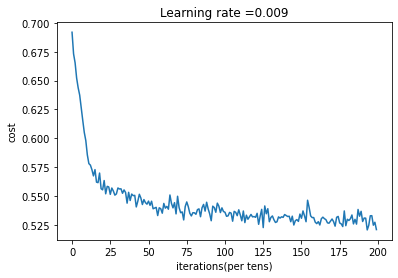

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.7524722
Test Accuracy: 0.73875


In [18]:
#48 24 12 4


_, _, parameters = model(X_train, Y_train, X_test, Y_test)